In [1]:
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import matplotlib.pyplot as plt

Preprocess Data

In [0]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

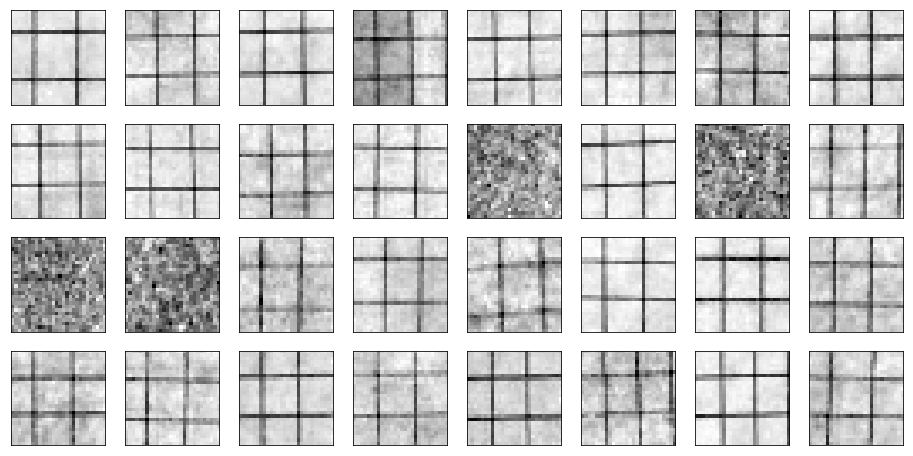

In [6]:
# /content/gdrive/My Drive/

import os
import skimage.io as io
from skimage.color import rgb2gray
from skimage.transform import  resize


BG_PATH = '/content/gdrive/My Drive/data/DigitBackgrounds/'

bg_fnames = os.listdir(BG_PATH)

bg_imgs = []

plt.figure(figsize=(16,8))

for i, bg_fname in enumerate(bg_fnames):

  bg_img = io.imread(BG_PATH + bg_fname)
  gray_bg_img = rgb2gray(bg_img)
  
  gray_bg_img = 1 - resize(gray_bg_img, (28, 28), anti_aliasing=True)
  
  bg_imgs.append(gray_bg_img)
  
  plt.subplot(4, 8, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(gray_bg_img, cmap=plt.cm.binary)

plt.show()

In [7]:
import numpy as np
import random

new_x_train = []
new_y_train = []
new_x_test = []
new_y_test = []

for test_idx, img in enumerate(x_test):
  bg_img = random.choice(bg_imgs)
  mask = img > 0.5
  new_img = bg_img.copy()
  new_img[mask] = img[mask].copy()
  new_x_test.append(new_img)
  new_y_test.append(y_test[test_idx])

for i, bg_img in enumerate(bg_imgs):
  print("%d from %d" % (i, len(bg_imgs)))
  for train_idx, img in enumerate(x_train):
    mask = img > 0.5
    new_img = bg_img.copy()
    new_img[mask] = img[mask].copy()
    new_x_train.append(new_img)
    new_y_train.append(y_train[train_idx])


# plt.subplot(2, 3, 1)
# plt.imshow(img, cmap=plt.cm.binary)
# plt.subplot(2, 3, 2)
# plt.imshow(bg_img, cmap=plt.cm.binary)
# plt.subplot(2, 3, 3)
# plt.imshow(new_img, cmap=plt.cm.binary)
# plt.subplot(2, 3, 4)
# plt.hist(img)
# plt.subplot(2, 3, 5)
# plt.hist(bg_img)
# plt.show()

0 from 32
1 from 32
2 from 32
3 from 32
4 from 32
5 from 32
6 from 32
7 from 32
8 from 32
9 from 32
10 from 32
11 from 32
12 from 32
13 from 32
14 from 32
15 from 32
16 from 32
17 from 32
18 from 32
19 from 32
20 from 32
21 from 32
22 from 32
23 from 32
24 from 32
25 from 32
26 from 32
27 from 32
28 from 32
29 from 32
30 from 32
31 from 32


In [0]:
x_train = np.array(new_x_train)
y_train = np.array(new_y_train)
del(new_x_train)

x_test = np.array(new_x_test)
y_test = np.array(new_y_test)
del(new_x_test)

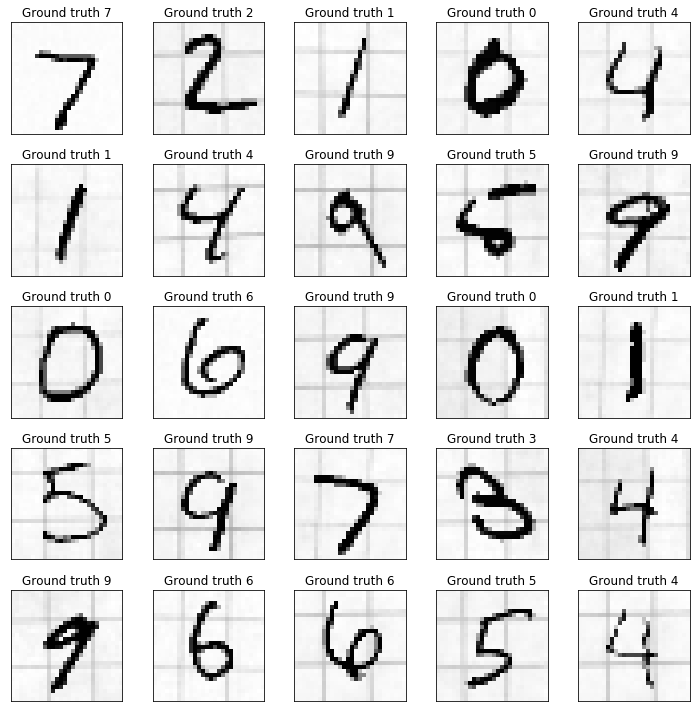

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title("Ground truth %s" % (y_test[i],))
    
plt.tight_layout()
plt.show()

In [0]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2)

In [12]:
from keras import Sequential, layers
from keras.layers.advanced_activations import LeakyReLU

model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding='Same', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(LeakyReLU())

model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding='Same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU())

model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='Same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU())

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='Same'))
model.add(layers.BatchNormalization())
model.add(LeakyReLU())


model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(LeakyReLU())
model.add(layers.Dense(10, activation="softmax"))

model.summary()

W0811 21:36:28.830498 140045531789184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 21:36:28.853149 140045531789184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 21:36:28.870703 140045531789184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 21:36:28.918237 140045531789184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0811 21:36:28.919616 1400455317

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [13]:
from keras import optimizers

optimizer = optimizers.Nadam()

model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

W0811 21:36:31.244412 140045531789184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
from keras import callbacks

learning_rate_reduction = callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [21]:
# Fit the model
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data=(x_validation, y_validation), steps_per_epoch=len(x_train) // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/1
17860/17860 [==============================] - 349s 20ms/step - loss: 0.0228 - acc: 0.9928 - val_loss: 0.0111 - val_acc: 0.9966


In [22]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 98us/step


[0.02447130103010859, 0.9924]

In [0]:
y_pred = model.predict(x_test)

In [24]:
len(np.arange(len(y_pred))[np.logical_not(np.logical_and(y_pred.argmax(), y_test))])

980

In [0]:
model.save("/content/gdrive/My Drive/saved_models/tmp_mnis99.5%.h5")